# 📊 Regressione Lineare con il Dataset delle Altezze

In questo notebook esploreremo un dataset contenente l'altezza dei padri (`fheight`) e dei figli (`sheight`), con l'obiettivo di costruire un modello di regressione lineare per prevedere l'altezza del figlio conoscendo quella del padre.

---

## Obiettivo

Guidarti passo dopo passo attraverso il ciclo di vita di un progetto di *Machine Learning supervisionato*, includendo:
- Esplorazione dei dati
- Preprocessing
- Addestramento del modello
- Valutazione
- Visualizzazione dei risultati


## 🔍 1. Esplorazione del dataset

### ✏️ Esercizio 1.1
Carica il dataset `pearson_dataset.csv` e stampa le prime 5 righe per esplorare la struttura dei dati.


In [3]:
# Qui faccio l'esercizio 1.1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pearson_dataset.csv")
df.head()

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fheight  1078 non-null   float64
 1   sheight  1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


### ✏️ Esercizio 1.2
Calcola media, mediana e deviazione standard delle due colonne `fheight` e `sheight`.


In [5]:
# Qui esercizio 1.2
import pandas as pd

df = pd.read_csv("pearson_dataset.csv")
media = df.mean()
print("La media è: ")
print(media)
print("")

mediana = df.median()
print("La mediana è: ")
print(mediana)
print("")

deviazione = df.std()
print("La deviazione standard è: ")
print(deviazione)

La media è: 
fheight    67.687097
sheight    68.684070
dtype: float64

La mediana è: 
fheight    67.76660
sheight    68.61582
dtype: float64

La deviazione standard è: 
fheight    2.744868
sheight    2.814702
dtype: float64


### ✏️ Esercizio 1.3
Invoca la funzione per disegnare uno scatterplot con `fheight` sull'asse X e `sheight` sull'asse Y per visualizzare la relazione tra le due variabili.




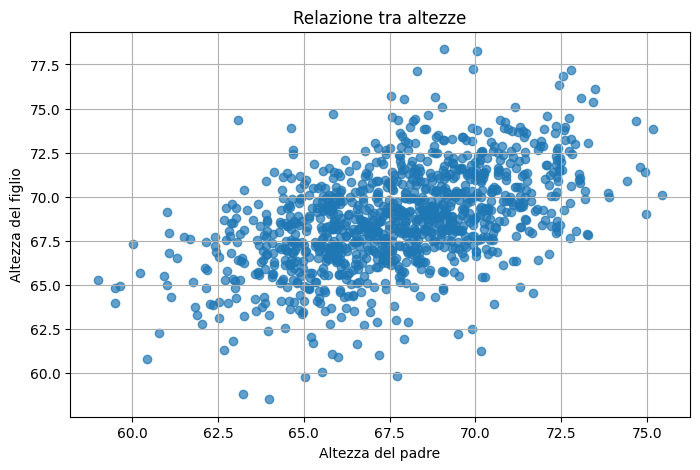

In [6]:
import matplotlib.pyplot as plt

def plot_scatter(df, x_col, y_col, x_label=None, y_label=None, title=None):
    """
    Crea uno scatter plot generico tra due colonne di un DataFrame.

    Parametri:
    - df: pandas DataFrame contenente i dati
    - x_col: nome della colonna da usare sull'asse X
    - y_col: nome della colonna da usare sull'asse Y
    - x_label: etichetta asse X (opzionale)
    - y_label: etichetta asse Y (opzionale)
    - title: titolo del grafico (opzionale)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.title(title if title else f"{y_col} vs {x_col}")
    plt.grid(True)
    plt.show()

# Esempio d'uso
plot_scatter(df, "fheight", "sheight", "Altezza del padre", "Altezza del figlio", "Relazione tra altezze")


## 🧹 2. Preprocessing dei dati

### ✏️ Esercizio 2.1
Verifica se ci sono valori nulli nel dataset.


In [7]:

df.isnull().sum()

fheight    0
sheight    0
dtype: int64

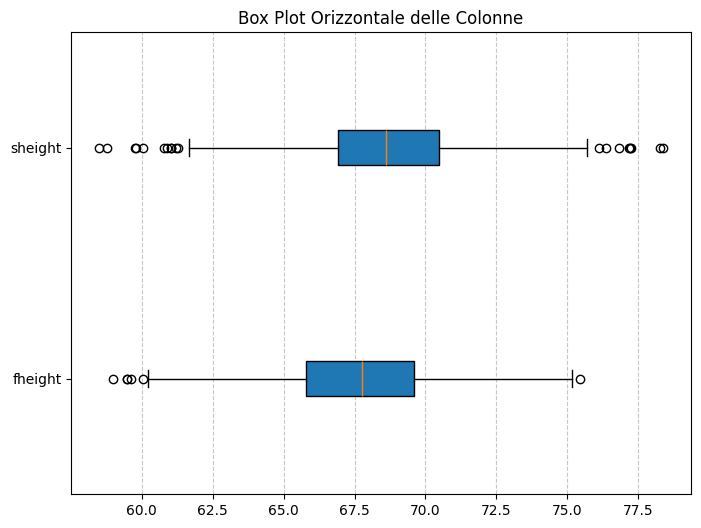

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



plt.figure(figsize=(8, 6))
plt.boxplot(df.values, vert = False, patch_artist = True)

plt.yticks(range(1, len(df.columns) + 1), df.columns)

plt.title("Box Plot Orizzontale delle Colonne")
plt.grid(axis="x", linestyle= "--", alpha = 0.7)

plt.show()

# Box Plot Orizzontale delle Colonne

## Interpretazione statistica dettagliata

### 1. Struttura del box plot
- Ogni rettangolo blu (scatola) rappresenta l'**intervallo interquartile (IQR)** che va dal primo quartile (Q1, 25° percentile) al terzo quartile (Q3, 75° percentile)
- La linea arancione verticale all'interno della scatola indica la **mediana** (Q2, 50° percentile)
- I "baffi" si estendono tipicamente fino a 1.5 volte l'IQR oltre Q1 e Q3
- I punti oltre i baffi sono considerati **outlier** (valori anomali)

### 2. Analisi comparativa
- **sheight**: Presenta una distribuzione più ampia con:
 - Mediana intorno a 69
 - Maggiore presenza di outlier su entrambi gli estremi
 - Una distribuzione che appare leggermente asimmetrica
 - Valori estremi che si estendono fino a circa 78 sul lato destro

- **fheight**: Mostra una distribuzione leggermente più compatta con:
 - Mediana simile a sheight (circa 68-69)
 - Meno outlier rispetto a sheight
 - Una distribuzione che appare più simmetrica
 - Range interquartile leggermente più ristretto

### 3. Significato statistico
- L'ampiezza dell'IQR indica la variabilità dei dati: più larga è la scatola, maggiore è la dispersione
- La posizione della mediana rispetto ai bordi della scatola indica l'asimmetria della distribuzione
- La presenza di outlier suggerisce valori che deviano significativamente dalla tendenza centrale

### 4. Ipotesi sul significato delle variabili
- Se "sheight" si riferisce all'altezza dei figli (*son height*) e "fheight" all'altezza dei padri (*father height*), questo grafico potrebbe essere utilizzato in uno studio di genetica o ereditarietà
- La somiglianza nelle distribuzioni suggerisce una correlazione tra le due variabili, come ci si aspetterebbe nel caso dell'ereditarietà di caratteristiche fisiche
- Le unità di misura sembrano essere in pollici, dato il range dei valori (60-78)

### 5. Implicazioni scientifiche
- La maggiore variabilità in "sheight" potrebbe indicare l'influenza di fattori ambientali o di altri fattori genetici oltre a quelli paterni
- La presenza di outlier in entrambe le distribuzioni suggerisce casi eccezionali che potrebbero meritare un'analisi più approfondita
- La scala sull'asse x (60-78) è coerente con il range tipico delle altezze umane adulte espresse in pollici

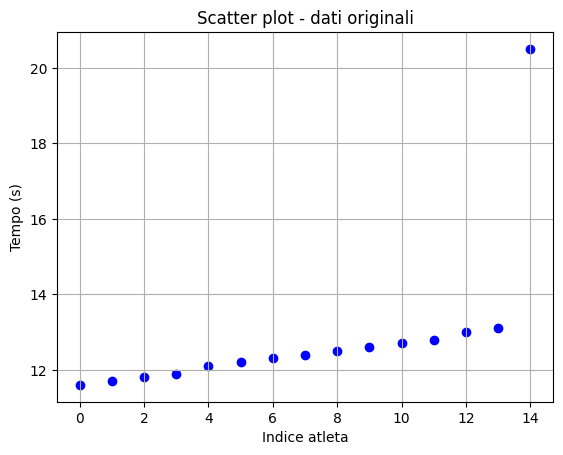

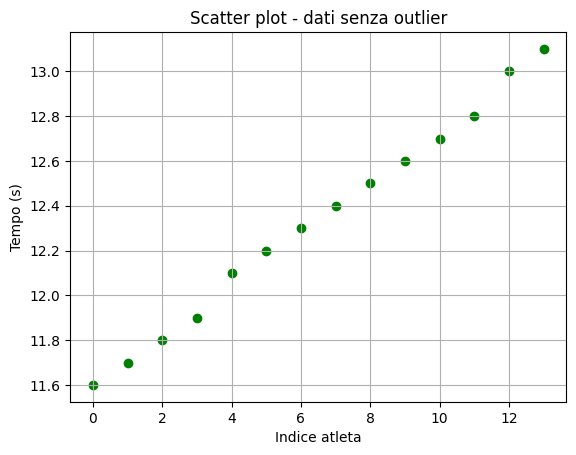

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

tempi = [11.6, 11.7, 11.8, 11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 13.0, 13.1, 20.5]

df_tempi = pd.DataFrame({'tempo': tempi})

plt.scatter(df.index, df_tempi['tempo'], color='blue')
plt.title("Scatter plot - dati originali")
plt.xlabel("Indice atleta")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.show()

Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

limite_inferiore = Q1 - 1.5 * IQR
limite_superiore = Q3 + 1.5 * IQR

# Filtro dei dati senza outlier
df_filtrato = df_tempi[(df_tempi['tempo'] >= limite_inferiore) & (df_tempi['tempo'] <= limite_superiore)]

# Scatter plot dei dati filtrati (senza outlier)
plt.scatter(df_filtrato.index, df_filtrato['tempo'], color='green')
plt.title("Scatter plot - dati senza outlier")
plt.xlabel("Indice atleta")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.show()

### ✏️ Esercizio 2.2
Standardizza o normalizza i dati (opzionale) per sperimentare come cambiano i risultati.


[59.008   58.50708]
[75.43393 78.36479]


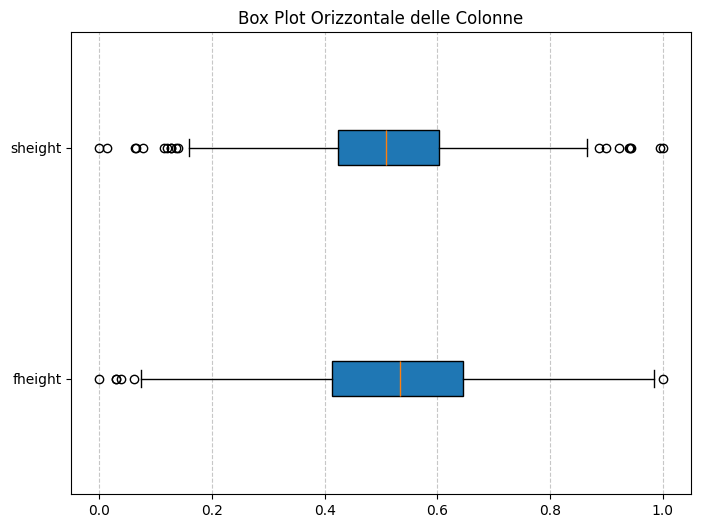

In [24]:
# Esercizio 2.2
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("pearson_dataset.csv")

scaler = MinMaxScaler()

# fit -> calcola il minimo e massimo senza applicare le trasformazioni

scaler.fit(df)

print(scaler.data_min_)
print(scaler.data_max_)

numpy_array = scaler.transform(df)

df_scaled = pd.DataFrame(numpy_array, columns = df.columns)
df_scaled.head()

plt.figure(figsize=(8, 6))
plt.boxplot(df_scaled.values, vert = False, patch_artist = True)

plt.yticks(range(1, len(df_scaled.columns) + 1), df_scaled.columns)

plt.title("Box Plot Orizzontale delle Colonne")
plt.grid(axis="x", linestyle= "--", alpha = 0.7)

plt.show()

## 🤖 3. Creazione del modello

### ✏️ Esercizio 3.1
Dividi il dataset in un training set (80%) e un test set (20%).


In [33]:
# Esercizio 3.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train_test_split -> mi restituisce 4 variabili: x_train, x_test, y_train, y_test purchè io gli passi argomenti i dati di input e i dati di output

# y = m*x + q
X = df.drop(columns = ['sheight']) # in x ci sarà solo la colonna dell'altezza dei padri
y = df['sheight'] # in y ci sarà la nostra colonna target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("dimensione del dataset di train", X_train.shape)
print("dimensione del dataset di test", X_test.shape)

# provate voi a fare la normalizzazione dei dati
scaler = MinMaxScaler()
scaler_df_train = scaler.fit(X_train), scaler.fit(y_train)

numpy_array_train = scaler.transform(scaler_df_train)

scaler_df_test = scaler.fit(X_test), scaler.fit(y_test)
numpy_array_test = scaler.transform(scaler_df_test)


model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

# fase di test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

dimensione del dataset di train (862, 1)
dimensione del dataset di test (216, 1)


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### ✏️ Esercizio 3.2
Allena un modello di regressione lineare usando i dati di training.


In [37]:
# Esercizio 3.2
import numpy as np

x = np.linspace(10, 100, 50) # liste di numeri equispaziali
x = np.linspace(df['fheight'].min(), df['fheight'].max(), 100).reshape(-1, 1) # parte da una li sta monodimensionale e crea un vettore colonna in cui la II dimensione 

y_pred = model.predict(x)
print(x)

plt.plot(x_plot,

[[59.008     ]
 [59.17391848]
 [59.33983697]
 [59.50575545]
 [59.67167394]
 [59.83759242]
 [60.00351091]
 [60.16942939]
 [60.33534788]
 [60.50126636]
 [60.66718485]
 [60.83310333]
 [60.99902182]
 [61.1649403 ]
 [61.33085879]
 [61.49677727]
 [61.66269576]
 [61.82861424]
 [61.99453273]
 [62.16045121]
 [62.3263697 ]
 [62.49228818]
 [62.65820667]
 [62.82412515]
 [62.99004364]
 [63.15596212]
 [63.32188061]
 [63.48779909]
 [63.65371758]
 [63.81963606]
 [63.98555455]
 [64.15147303]
 [64.31739152]
 [64.48331   ]
 [64.64922848]
 [64.81514697]
 [64.98106545]
 [65.14698394]
 [65.31290242]
 [65.47882091]
 [65.64473939]
 [65.81065788]
 [65.97657636]
 [66.14249485]
 [66.30841333]
 [66.47433182]
 [66.6402503 ]
 [66.80616879]
 [66.97208727]
 [67.13800576]
 [67.30392424]
 [67.46984273]
 [67.63576121]
 [67.8016797 ]
 [67.96759818]
 [68.13351667]
 [68.29943515]
 [68.46535364]
 [68.63127212]
 [68.79719061]
 [68.96310909]
 [69.12902758]
 [69.29494606]
 [69.46086455]
 [69.62678303]
 [69.79270152]
 [69.95862

C:\Users\Utente\Desktop\linear-regression\my_virtualenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ✏️ Esercizio 3.3
Visualizza la retta di regressione sopra il grafico scatter.

👇 Ti diamo qui un esempio di funzione da utilizzare per questo tipo di visualizzazione:


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_line(x, y, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Dati reali')
    predicted = model.predict(np.array(x).reshape(-1, 1))
    plt.plot(x, predicted, color='red', label='Retta di regressione')
    plt.xlabel("Altezza del padre (fheight)")
    plt.ylabel("Altezza del figlio (sheight)")
    plt.title("Regressione Lineare")
    plt.legend()
    plt.grid(True)
    plt.show()

## 📏 4. Valutazione del modello

### ✏️ Esercizio 4.1
Calcola l’MSE (Mean Squared Error) e R² sul test set per valutare le performance del modello.


In [ ]:
# Esercizio 4.1

### ✏️ Esercizio 4.2
Usa il modello per prevedere l’altezza di un figlio dato un valore ipotetico di altezza del padre (es. 70 pollici).


In [ ]:
# Esercizio 4.2

## 🚀 5. Pezzi finali

### ✏️ Esercizio 5.1
Aggiungi del rumore casuale ai dati e osserva come cambiano i risultati della regressione.


In [ ]:
# Esercizio 5.1

### ✏️ Esercizio 5.2
Crea una funzione che prende in input l’altezza del padre da tastiera e restituisce la previsione dell’altezza del figlio.


In [ ]:
# Esercizio 5.2